**ids-pdl05-tut.ipynb**: This Jupyter notebook is provided by Joachim Vogt for the _Python Data Lab_ of the module _Introduction to Data Science_ offered in Fall 2022 at Jacobs University Bremen. Module instructors are Hilke Brockmann, Adalbert Wilhelm, and Joachim Vogt. Jupyter notebooks and other learning resources are available from a dedicated _module platform_.

# Matplotlib basics

This tutorial provides an introduction to basic data visualization using the Python module matplotlib. Follow the instructions below to learn to

- [ ] load numerical data from regular text files,
- [ ] generate numerical grids and compute grid functions,
- [ ] produce line plots and scatter diagrams,
- [ ] assemble several plots in a single diagram,
- [ ] discern and handle both the MATLAB-style and the object-oriented approach to plotting,
- [ ] visualize two-dimensional arrays as images and contour diagrams.

If you wish to keep track of your progress, you may edit this markdown cell, check a box in the list above after having worked through the respective part of this notebook, and save the file.

*Short exercises* are embedded in this notebook. *Sample solutions* can be found at the end of the document.

The Matplotlib project is hosted at [matplotlib.org](https://matplotlib.org).

## Preparation

The following data files are expected to reside in the working directory. Identify the files on the module platform and upload them to the same folder as this Jupyter notebook.

- `SN_y_tot_V2.0.txt`: [Yearly mean total sunspot number](https://www.sidc.be/silso/infosnytot) provided by the [World Data Center for the production, preservation and dissemination of the international sunspot number (SILSO)](https://sidc.be/silso/home) through the [SILSO download page](https://www.sidc.be/silso/datafiles).
- `march2014_1920x1200.jpeg`: [color image](https://www.nasa.gov/sites/default/files/thumbnails/image/march2014_1920x1200.jpeg) (Credit: NASA/USGS Landsat; Geoscience Australia) featured on [this NASA website](https://www.nasa.gov/image-feature/color-explosion-beautiful-earth). The source image was taken in May 2013 by the Landsat 8 satellite over Western Australia, and then enhanced.
- `anotherplot.png`: graphics file for the exercise *Line plots and scatter diagrams*.
- `subplots22.png`: graphics file for the exercise *Multiple plots in one diagram*.
- `landsat8_color_channels.png`: graphics file for the exercise *Color image taken by Landsat*.

Run the following code cell to import standard Python data science libraries. The NumPy module facilitates efficient processing of numerical arrays, and is usually imported as `np`. From the matplotlib library we import the package `pyplot` using the standard abbreviation `plt`. The magic command `%matplotlib inline` (IPython shell) 
allows for inline display of graphics.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading numerical data from regular text files

The matplotlib functionality to produce basic line and scatter plots is demonstrated using the file `SN_y_tot_V2.0.txt` listing the [yearly mean total sunspot number](https://www.sidc.be/silso/infosnytot) since 1700.  It is a plain text (ASCII) file without header consisting of four columns: year, average number of sunspots, standard deviation, number of measurements entering the average. For the latter two variables, missing data are indicated by the value `-1`. For brevity, we refer to the average number of sunspots as the *sunspot number*.

Plain text files with such a regular rectangular structure can be loaded, e.g., by means of the NumPy functions ``loadtxt()`` or ``genfromtxt()``. The former function is faster when no data are missing while the latter function works also in the case of missing data.

In [7]:
alldata = np.loadtxt('SN_y_tot_V2.0.txt')

The data are read from the text file and stored in the two-dimensinal array ``alldata`` (a matrix). You may extract the data from the first two columns (year and sunspot number) into one-dimensional arrays (vectors) as follows.

In [8]:
year = alldata[:,0]
nspots = alldata[:,1]

One may associate columns more directly with data vectors by means of the keywords `usecols` and `unpack`.

In [9]:
year,nspots = np.loadtxt('SN_y_tot_V2.0.txt',usecols=(0,1),unpack=True)

### Exercise: Loading numerical data from regular text files

Consult the documentation to learn more about the functions `np.loadtxt()` and `np.genfromtxt()`. Using data from the file `SN_y_tot_V2.0.txt`, complete the code cell below according to the instructions given as comments.

In [10]:
### Find the maximum of the series of sunspot numbers, and also the year when this maximum was observed.
print('Maximum sunspot number      : ',nspots.max())
print('Maximum observed in year    : ',year[nspots.argmax()])
### Copy the last decade of the 20th century (1990.5-1999.5) from alldata to a new matrix data90.

### Using print(), display the first and the last rows of the data matrix data90.

### Copy data with valid standard deviations (non-negative values) from alldata to a new matrix obsdata.

### Using print(), display the first and the last rows of the data matrix obsdata.

### Using np.genfromtxt() with keywords usecols and unpack, load standard deviations into the vector std.

### Print the first three elements of the vector std.

### Print the last three elements of the vector std.


Maximum sunspot number      :  269.3
Maximum observed in year    :  1957.5


## Basic plot example

To demonstrate and explain the overall logic of the `matplotlib` module, this tutorial highlights the function `plot()` from `matplotlib.pyplot` (imported as `plt`) by means of numerical grids and grid functions introduced in the next section. The current section demonstrates selected features using the sunspot numbers loaded from the data file in the previous section.

With only one (vectorial) array, the function `plot()` displays its values versus the array indices. Without additional arguments, the points are connected by straight line segments.

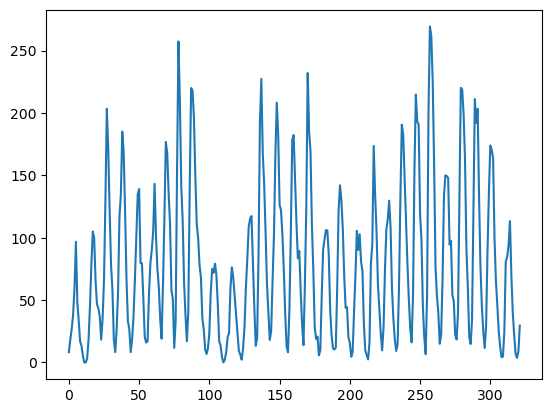

In [11]:
plt.plot(nspots)

Properties of the plot can be controled through keywords such as `linestyle`, `marker`, and `color`. To obtain a scatter diagram, set `linestyle=''`.

In [ ]:
plt.plot(nspots,marker='+',linestyle='')

The plot command with two array arguments displays the values of the second array versus the values of the first one, for all valid indices. The keyword `linewidth` controls the width of plot lines.

In [ ]:
plt.plot(year,nspots,linewidth=3)

Additional plot elements (title, axes annotations) and different styles are produced easily. We may also enforce specific limits on the coordinate axes, overriding the default with small margins separating the plot from the axes.

In [ ]:
plt.plot(year,nspots,color='black')
plt.title('Sunspot numbers 1700-2000')
plt.xlabel('Year')
plt.ylabel('Sunspot number')
plt.xlim((1700,2000))
plt.ylim((0,200))
plt.fill_between(year,nspots,color='yellow')

Consult the documentation to learn more about the function `plt.plot()`.

In [ ]:
### Uncomment one of the following lines to learn more about plt.plot().
#plt.plot?
#help(plt.plot)

## Numerical grids and grid functions

Plot software requires real intervals with infinite numbers of points to be discretized, i.e., approximated by a finite subset of points called a *numerical grid*. An *equidistant* grid is characterized by a constant spacing between two subsequent elements. Functions that are evaluated on a numerical grid are called *grid functions*. In NumPy, numerical grids can be generated in several ways, e.g., by calling ``np.array()`` with an appropriate list argument, through ``np.arange()``, or using the function ``np.linspace()``. See the NumPy documentation for more information.

In [ ]:
### Uncomment one of the following lines to obtain information about np.linspace().
#np.linspace?
#help(np.linspace)

The following instructions produce an equidistant discretization of the interval $[a,b]$ with $N$ sub-intervals.

In [ ]:
a = 1
b = 3
N = 4
x = np.linspace(a,b,num=N+1)
print(x)

With numerical grids such as the array ``x``, grid functions are easily defined. The following instruction produces the set of values $ \{ f_0, f_1, f_2, \ldots\}$ with $f_n = x_n \exp(x_n)$, and stores them in the grid function `f`.

In [ ]:
f = x*np.exp(x)
print(f)

The following piece of code yields a discretization of time $t$ on $[0,4]$ with $N = 8$ sub-intervals, and then defines two cosine functions $\cos(2 \pi t / P )$ with periods $P = 2$ and $P = 4$.

In [ ]:
t = np.linspace(0,4,num=9)
c2 = np.cos(2*np.pi*t/2)
c4 = np.cos(2*np.pi*t/4)

### Exercise: Numerical grids and grid functions

Complete the code cell below according to the instructions given as comments. In each case, display the result using `print()`.

In [ ]:
### Using np.linspace(), store an equidistant discretization of [-3,3] with grid spacing 0.5 in the array z.

#print(z)
### Store the square of the array z and in the array sqz.

#print(sqz)
### Store the square root of the array sqz in the array sqrsqz.

#print(sqrsqz)

## Line plots and scatter diagrams

Here is a summary of the features of `plt.plot()` we explored already in a previous section.

- Calling the plot function with only one argument `y` displays the values `y[k]` versus the indices `k`, either connected by straight line segments, or as individual points using predefined plot symbols.
- With two arguments `x` and `y`, the values `y[k]` are displayed versus the values `x[k]` for all valid indices `k`.
- The linestyle can be controlled through the keyword parameter `linestyle` (or `ls`).
- The linewidth can be specified using the keyword parameter `linewidth` (or `lw`).
- The color can be controlled through the keyword parameter `color` (or `c`).
- Marker symbols can be added using the keyword parameter `marker` (or `m`).

Some of the functionality is also available through *format strings*, e.g., `'r--'` produces a plot with data connected by red dashed lines.

In the following code cell, anticipate the graphics produced by the instructions in comments, then uncomment individual lines to check.

In [ ]:
x = np.linspace(-1,1,5)
y = np.cos(np.pi*x/2)
#plt.plot(y)
#plt.plot(x,y)
#plt.plot(x,y,marker='s')
#plt.plot(y,'--')
#plt.plot(x,y,'s',ls='')
#plt.plot(x,y,'g-.')
#plt.plot(x,y,c='k',lw=3,ls=':')

When `plot()` or another plotting function such as `scatter()` or `imshow()` is called, the output becomes part of an implicitly generated figure object. Although such an automatic generation is convenient, it is usually cleaner and more robust to explicitly open figure objects, e.g., using the function `figure()`. The resulting object can be stored in a  variety of graphics formats by means of the function `savefig()`.

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.plot(np.cos(np.pi*np.linspace(-1,1,5)/2))
### Uncomment the following line to store the graphics in png format.
#fig.savefig('plainplot.png')
### Uncomment the following line to see the built-in documentation of the figure object.
#help(fig)

Plot title and axes annotations can be added in successive command lines with string variables as arguments. A legend is constructed using the strings provided in `plot()` with the keyword `label`. You may also add a grid for better readability of numerical values.

In [ ]:
### Equidistant discretization of [-1,1] with spacing 0.5.
x = np.linspace(-1,1,5)
### Definition of grid function.
y = np.cos(np.pi*x/2)
### Open a new figure object of default size.
plt.figure()
### Create a black line plot of y versus x, set label to be used in legend().
plt.plot(x,y,color='k',label='Line segments')
### Mark grid points with red circles.
plt.plot(x,y,'ro',label='Marker symbols')
### Add a straight line at y=0.5.
plt.plot(x,0.5*np.ones(len(x)),'g--',label='Straight line')
### Add plot title and axes annotations.
plt.title('A simple plot')
plt.xlabel('x axis')
plt.ylabel('y axis')
### Construct a plot legend from labels set in the previous calls to plot().
plt.legend()
### Add a grid for better readability of numerical values.
plt.grid()

### Exercise: Line plots and scatter diagrams

Complete the code cell below to produce the following diagram. The labels are created by means of the keywords 
`label='$e^{-x}$')` and `label='$(x-1)^2$'`.

![](anotherplot.png)

In [ ]:
### Using np.linspace(), store an equidistant discretization of [0,2] with grid spacing 0.1 in the array x.

### Store grid functions e^{-x} and (x-1)^2 in arrays y1 and y2, respectively.

### Using figure(), open a new figure object of default size.

### Plot y1 and y2 versus x using the line styles and colors in the diagram.

### Add title and axes annotations.

### Add a legend.

### Store the figure in png format.


## Multiple plots in one diagram

A straightforward way to obtain several plots in one diagram is through the function `subplot(nrows,ncols,pos)`, creating an array of (plot) axes where `nrows` and `ncols` give the number of rows and columns, respectively. The third parameter `pos` points to the current position in the array. Modify the code in the following cell and observe the output of functions for different sets of parameters.

In [ ]:
### Equidistant discretization of [-1,1] with spacing 0.1.
x = np.linspace(-1,1,21)
### Definition of grid functions.
y1 = x
y2 = x**2
y3 = x**3
### Open a new figure object of default size.
plt.figure(figsize=(10,6))
### First plot in a (2,3) array.
plt.subplot(2,3,1)
plt.plot(x,y1,color='k')
plt.title(r'Function $y=x$')
plt.ylabel('y axis')
### Second plot in a (2,3) array.
plt.subplot(2,3,2)
plt.plot(x,y2,color='k')
plt.title(r'Function $y=x^2$')
### Third plot in a (2,3) array.
plt.subplot(2,3,3)
plt.plot(x,y3,color='k')
plt.title(r'Function $y=x^3$')
### Fourth plot in a (2,3) array.
plt.subplot(2,3,4)
plt.plot(x,y1,'go')
plt.xlabel('x axis')
plt.ylabel('y axis')
### Fifth plot in a (2,3) array.
plt.subplot(2,3,5)
plt.plot(x,y2,'go')
plt.xlabel('x axis')
### Sixth plot in a (2,3) array.
plt.subplot(2,3,6)
plt.plot(x,y3,'go')
plt.xlabel('x axis')

The logic of the plot commands presented so far, inspired by the plot interface of the MATLAB software, is one of two approaches supported by matplotlib. The second option may be referred to as *object-oriented approach*, (emphasizing figures and figure elements as Python objects) and is demonstrated in the following cell. Study the example to see where the syntax differs from the MATLAB-style approach. Consult the documentation of `plt.subplots()` for details and further information.

In [ ]:
### Equidistant discretization of [-1,1] with spacing 0.1.
x = np.linspace(-1,1,21)
### Definition of grid functions.
y1 = x
y2 = x**2
y3 = x**3
### Open a new figure object to store a (2,3) array of plots.
fig,axs = plt.subplots(2,3,figsize=(10,6))
### Plot at the [0,0] position.
axs[0,0].plot(x,y1,color='k')
axs[0,0].set_title(r'Function $y=x$')
axs[0,0].set_ylabel('y axis')
### Plot at the [0,1] position.
axs[0,1].plot(x,y2,color='k')
axs[0,1].set_title(r'Function $y=x^2$')
### Plot at the [0,2] position.
axs[0,2].plot(x,y3,color='k')
axs[0,2].set_title(r'Function $y=x^3$')
### Plot at the [1,0] position.
axs[1,0].plot(x,y1,'go')
axs[1,0].set_xlabel('x axis')
axs[1,0].set_ylabel('y axis')
### Plot at the [1,1] position.
axs[1,1].plot(x,y2,'go')
axs[1,1].set_xlabel('x axis')
### Plot at the [1,2] position.
axs[1,2].plot(x,y3,'go')
axs[1,2].set_xlabel('x axis')
### Store figure in png format.
#fig.savefig('subplots23.png')

### Exercise: Multiple plots in one diagram

Using the object-oriented approach to producing plot figures, complete the code cell below to produce the following diagram.

![](subplots22.png)

In [ ]:
### Equidistant discretization of [0,2] with spacing 0.2.

### Definition of grid functions.

### Open a new figure object to store a (2,2) array of plots.

### Plot at the [0,0] position.

### Plot at the [0,1] position.

### Plot at the [1,0] position.

### Plot at the [1,1] position.

### Store figure in png format.


## Contour plots and digital images

Matplotlib offers several options for the visualization of two-dimensional arrays (matrices). For instance, they can displayed as images using the function `imshow()`, or visualized through contour lines (connecting positions sharing the same value, also called level sets) by means of the functions `contour()` and `contourf()`. In contrast to `contour()` or `contourf()`, `imshow()` interpretes array elements as square pixels, and the aspect ratio is preserved. Furthermore, the pixels on the vertical axis are reversed, with zero at the top. Note that `imshow()` uses the default color map (keyword `cmap`). To enforce grayscale displays, set `cmap` to `plt.cm.gray`, or to the string variable 'gray'.  

In the example below, some of the visualization options are demonstrated using a two-dimensional array `f` with a bell-shaped profile in the horizontal direction (`x`) and oscillatory behavior in the vertical direction (`y`).

In [ ]:
### Define two-dimensional coordinate arrays x,y.
x,y = np.meshgrid(np.linspace(-2,2,201),np.linspace(-1,1,201))
### Create a two-dimensional array f with bell-shaped profile in x and oscillatory bahavior in y.
f = 100*(1 + np.exp(-x**2)*np.sin(2*np.pi*y))
### Open a figure object with a (2,2) array of subplots.
fig,axs = plt.subplots(2,2,figsize=(15,10))
### Subplot in position [0,0]: Contour lines.
cp0 = axs[0,0].contour(f)
fig.colorbar(cp0,ax=axs[0,0])
axs[0,0].set_title('$f(x,y)$ displayed using contour')
### Subplot in position [0,1]: Filled contour lines.
cp1 = axs[0,1].contourf(f)
fig.colorbar(cp1,ax=axs[0,1])
axs[0,1].set_title('$f(x,y)$ displayed using contourf')
### Subplot in position [1,0]: Image using default color map.
im0 = axs[1,0].imshow(f)
fig.colorbar(im0,ax=axs[1,0])
axs[1,0].set_title("$f(x,y)$ displayed using imshow, default cmap")
### Subplot in position [1,1]: Gray scale image.
im1 = axs[1,1].imshow(f,cmap='gray')
fig.colorbar(im1,ax=axs[1,1])
axs[1,1].set_title("$f(x,y)$ displayed using imshow, cmap='gray'")
### Save figure in png format.
#---fig.savefig('contourf_imshow.png',facecolor=None,bbox_inches='tight')

Consult the Python documentation for further visualization options, e.g., surface plots or wireframe meshes.

### Exercise: Color image taken by Landsat

Color images are stored in several two-dimensional arrays. Each of the arrays (also called channels) represents one color according to a color model, typically RGB (red-green-blue). A four-channel version of the RGB model is RGBA, with the channel A (alpha) quantifying transparency.

The code in the following cell starts by loading the [color image `march2014_1920x1200.jpeg`](https://www.nasa.gov/sites/default/files/thumbnails/image/march2014_1920x1200.jpeg) (Credit: NASA/USGS Landsat; Geoscience Australia) featured on [this NASA website](https://www.nasa.gov/image-feature/color-explosion-beautiful-earth). Using the object-oriented approach to plotting in matplotlib, complete the code cell to generate the graphics below. In the upper left panel, the color image is displayed. The other three panels show the separate color channels as grayscale plots. Note that the two-dimensional matrix in channel `k` can be extracted from the three-dimensional array `data`  through `data[...,k]`.

![](landsat8_color_channels.png)

In [ ]:
### Load the color image.
from PIL import Image
data = np.asarray(Image.open('march2014_1920x1200.jpeg'))
print('Shape of the data array: {}'.format(data.shape))
### Open a figure object with a (2,2) array of subplots.

### Subplot in position [0,0]: Color image, all channels.

### Subplot in position [0,1]: Color image, channel 0 (red).

### Subplot in position [1,0]: Color image, channel 1 (green).

### Subplot in position [1,1]: Color image, channel 2 (blue).

### Save figure in png format.


---
---

## Solutions

### Solution: Loading numerical data from regular text files

In [ ]:
### Find the maximum of the series of sunspot numbers, and also the year when this maximum was observed.
print('Maximum sunspot number      : ',nspots.max())
print('Maximum observed in year    : ',year[nspots.argmax()])
### Copy the last decade of the 20th century (1990.5-1999.5) from alldata to a new matrix data90.
ind90 = (year>1990) & (year<2000)
data90 = alldata[ind90,:]
### Using print(), display the first and the last rows of the data matrix data90.
print('First row of matrix data90  : ',data90[0,:])
print('Last row of matrix data90   : ',data90[-1,:])
### Copy data with valid standard deviations (non-negative values) from alldata to a new matrix obsdata.
valid = alldata[:,2]>=0
obsdata = alldata[valid,:]
### Using print(), display the first and the last rows of the data matrix obsdata.
print('First row of matrix obsdata : ',obsdata[0,:])
print('Last row of matrix obsdata  : ',obsdata[-1,:])
### Using np.genfromtxt() with keywords usecols and unpack, load standard deviations into the vector std.
std = np.genfromtxt('SN_y_tot_V2.0.txt',usecols=(2,),unpack=True)
### Print the first three elements of the vector std.
print('First three elements of std : ',std[:3])
### Print the last three elements of the vector std.
print('Last three elements of std  : ',std[-3:])

### Solution: Numerical grids and grid functions

In [ ]:
### Using np.linspace(), store an equidistant discretization of [-3,3] with grid spacing 0.5 in the array z.
z = np.linspace(-3,3,num=13)
print(z)
### Store the square of the array z and in the array sqz.
sqz = z**2
print(sqz)
### Store the square root of the array sqz in the array sqrsqz.
sqrsqz = np.sqrt(sqz)
print(sqrsqz)

### Solution: Line plots and scatter diagrams

In [ ]:
### Using np.linspace(), store an equidistant discretization of [0,2] with grid spacing 0.1 in the array x.
x = np.linspace(0,2,21)
### Store grid functions e^{-x} and (x-1)^2 in arrays y1 and y2, respectively.
y1 = np.exp(-x)
y2 = (x-1)**2
### Using figure(), open a new figure object of default size.
plt.figure()
### Plot y1 and y2 versus x using the line styles and colors in the diagram.
plt.plot(x,y1,'b-',label='$e^{-x}$')
plt.plot(x,y2,'r:',label='$(x-1)^2$')
### Add title and axes annotations.
plt.title('Another simple plot')
plt.xlabel('$x$ coordinate')
plt.ylabel('$y$ coordinate')
### Add a legend.
plt.legend()
### Store the figure in png format.
#plt.savefig('anotherplot.png',facecolor=None,bbox_inches='tight')

### Solution: Multiple plots in one diagram

In [ ]:
### Equidistant discretization of [0,2] with spacing 0.2.
x = np.linspace(0,2,11)
### Definition of grid functions.
y1 = (x+1)**2
y2 = x**2 + 1
### Open a new figure object to store a (2,2) array of plots.
fig,axs = plt.subplots(2,2,figsize=(7,6))
### Plot at the [0,0] position.
axs[0,0].plot(x,y1,color='r')
axs[0,0].set_title(r'Function $y=(x+1)^2$')
axs[0,0].set_ylabel('y axis')
### Plot at the [0,1] position.
axs[0,1].plot(x,y2,color='g')
axs[0,1].set_title(r'Function $y=x^2+1$')
### Plot at the [1,0] position.
axs[1,0].plot(x,y1,'b*')
axs[1,0].set_xlabel('x axis')
axs[1,0].set_ylabel('y axis')
### Plot at the [1,1] position.
axs[1,1].plot(x,y2,'kd')
axs[1,1].set_xlabel('x axis')
### Store figure in png format.
#fig.savefig('subplots22.png')

### Solution: Color image taken by Landsat

In [ ]:
### Load the color image.
from PIL import Image
data = np.asarray(Image.open('march2014_1920x1200.jpeg'))
print('Shape of the data array: {}'.format(data.shape))
### Open a figure object with a (2,2) array of subplots.
fig,axs = plt.subplots(2,2,figsize=(13,8))
### Subplot in position [0,0]: Color image, all channels.
axs[0,0].imshow(data)
axs[0,0].set_title('Color image: all channels')
axs[0,0].set_ylabel('Vertical dimension [pixels]')
### Subplot in position [0,1]: Color image, channel 0 (red).
axs[0,1].imshow(data[...,0],cmap='gray')
axs[0,1].set_title('Color image: channel 0 (red)')
### Subplot in position [1,0]: Color image, channel 1 (green).
axs[1,0].imshow(data[...,1],cmap='gray')
axs[1,0].set_title('Color image: channel 1 (green)')
axs[1,0].set_xlabel('Horizontal dimension [pixels]')
axs[1,0].set_ylabel('Vertical dimension [pixels]')
### Subplot in position [1,1]: Color image, channel 2 (blue).
axs[1,1].imshow(data[...,2],cmap='gray')
axs[1,1].set_title('Color image: channel 2 (blue)')
axs[1,1].set_xlabel('Horizontal dimension [pixels]')
### Save figure in png format.
#---fig.savefig('landsat8_color_channels.png',facecolor=None,bbox_inches='tight')

---
---